# Plot Kinetic Fractionation Factor Functions

In [1]:
path_for_repo=f"/data37/kanon/modern_model_comparison"

In [2]:
import pathlib, sys
import numpy as np

In [3]:
iso_model_dir = pathlib.Path(f"{path_for_repo}/scripts/IsoFracPy").resolve()
sys.path.append(str(iso_model_dir))


from IsotopeFractionationModel import (
    plot_kin_frac_factor,
    kin_frac_factor_sea_evap,
    kin_frac_factor_supersat_ice
)

In [4]:
def main():
    dt = 0.1 # Temperature step [K]
    temp_list = np.arange(220-273.15, 300-273.15, dt) # Range of temperature in °C
    plot_kin_frac_factor(
        temp_list, 
        supersat_ice_param = 0.003, 
        temp_supersat_ice_thres = -20,
        surface_wind=6.5
    )

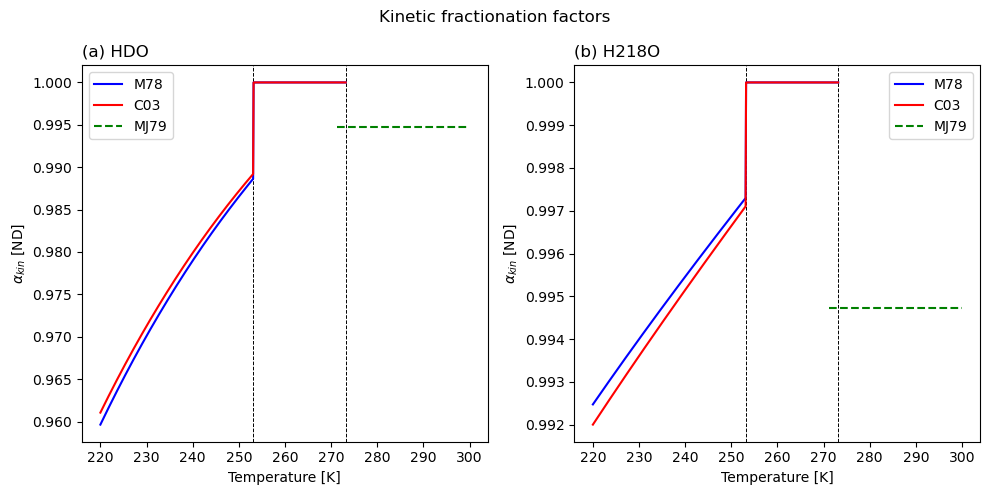

In [5]:
main()

In [6]:
help(kin_frac_factor_sea_evap)

Help on function kin_frac_factor_sea_evap in module IsotopeFractionationModel.KineticFractionation:

kin_frac_factor_sea_evap(temp_C: float, ISO_TYPE: str = 'HDO', u: float = None) -> float
    Calculate the kinetic fractionation factor for sea evaporation.
    
    Parameters:
    - temp_C (float): Temperature (°C).
    - ISO_TYPE (str): Isotope type, either "H218O" or "HDO".
    - u (float): Wind speed [m/s]. If not provided, a default value of 6.5 m/s
      is used for cases where u <7 m/s.
    
    Methods:
    - Validate the `ISO_TYPE` using the `check_variability` function.
    - Use coefficients for each isotope type based on Merlivat (1978),
    - If `u` < 7 m/s, apply a simplified formula; otherwise, use a linear
      relationship based on `u`.
    
    Returns:
    - float: Kinetic fractionation factor for sea evaporation.
    
    Raises:
    - UserWarning: If `u` is not provided, a default value is used with a warning.
    
    References:
    -  Merlivat and Jouzel (1979)

In [7]:
help(kin_frac_factor_supersat_ice)

Help on function kin_frac_factor_supersat_ice in module IsotopeFractionationModel.KineticFractionation:

kin_frac_factor_supersat_ice(temp_C: float, supersat_ice_param: float = 0.003, temp_thres: float = -20, ISO_TYPE: str = 'HDO', DIFFUSION_REF: str = 'M78') -> float
    Calculate the kinetic fractionation factor for supersaturated ice formation.
    
    Parameters:
    - temp_C (float): Temperature (°C).
    - supersat_ice_param (float): Supersaturation parameter. Default is 0.003.
    - temp_thres (float): Temperature threshold (°C) for supersaturation.
    - ISO_TYPE (str): Isotope type, either "H218O" or "HDO". Default is "HDO".
    - DIFFUSION_REF (str): Diffusion ratio reference, either "M78"
      (Merlivat, 1978) or "C03" (Cappa et al., 2003). Default is "M78".
    
    Methods:
    - Validate `ISO_TYPE`: and `DIFFUSION_REF` using `check_validity`.
    - Calculate the supersaturation factor (`S`) based on temperature.
    - Calculate the equilibrium fractionation factor (`alp